<IPython.core.display.Javascript object>


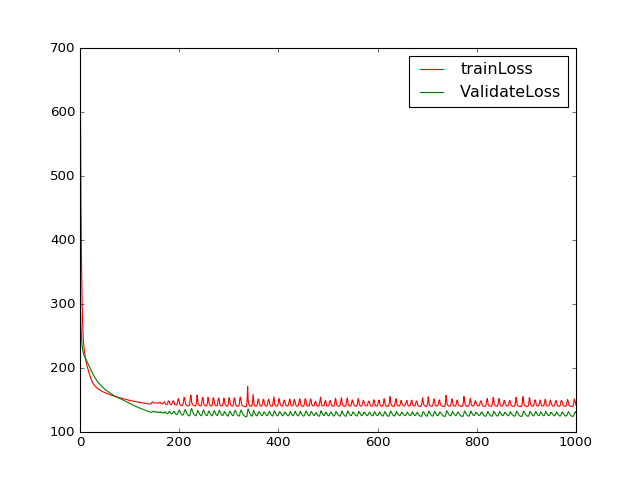

In [4]:
%matplotlib notebook
from sklearn.datasets import load_svmlight_file
from sklearn.cross_validation import train_test_split
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
from sklearn import metrics
import math

filename = "C:\\Users\\admin\\Desktop\\Jupyter\\australian.txt"
x, y = load_svmlight_file(filename)

x_train, x_validate, y_train, y_validate = train_test_split(x, y, test_size=0.2, random_state=1)
x_train,x_validate=x_train.toarray(),x_validate.toarray()
y_train, y_validate = y_train.reshape((-1,1)), y_validate.reshape((-1,1))
x_train = np.hstack([x_train, np.ones((x_train.shape[0], 1))])
x_validate=np.hstack([x_validate, np.ones((x_validate.shape[0], 1))])
m,n=np.shape(x_train)  #552 15 最后一列为1


param = np.ones((1, n))
learning_rate = 0.001
num_iter = 1000


lossTrain = np.zeros((1, num_iter))
lossValidate = np.zeros((1, num_iter))



for k in range(num_iter):
    grad = np.zeros((1, n))
    y_train_predict=x_train.dot(param.T)
    y_validate_predict=x_train.dot(param.T)

    #梯度下降 gradient=w-C*sum(x*y)
    #计算 sum（-x*y）
    for i in range(m):
        for j in range(n):
            if y_train[i,0] * y_train_predict[i,0] < 1:
                grad[0, j] +=-1*y_train[i,0] * x_train[i, j]
    #计算C*sum(-x*y）
    grad[0] *= 0.8
    #计算w-C*sum(x*y)
    for j in range(n):
        grad[0,j] += abs(param[0,j])
    #更新梯度 param=param-learning_rate * grad
    param[0] -= learning_rate * grad[0]


#     print("第", k, "次迭代：")
#     print("参数：")
#     print(param)

    loss_train = 0
    loss_validate = 0
    #loss = C*sum(max(0, 1-w*x*y)) + 0.5*||w||*||w||
    #计算sum(max(0, 1-w*x*y))
    for i in range(m):
        if y_train[i,0] * y_train_predict[i,0] < 1:
            loss_train = loss_train+ 1 - y_train[i,0] * y_train_predict[i,0]
    #计算 C*sum(max(0, 1-w*x*y))
    loss_train *= 0.8
    #计算 C*sum(max(0, 1-w*x*y)) + 0.5*||w||*||w||
    lossTrain[0, k] = loss_train + 0.5 * param.dot(param.T)
#     print("训练误差：", lossTrain)

    # loss = C*sum(max(0, 1-w*x*y)) + 0.5*||w||*||w||
    # 计算sum(max(0, 1-w*x*y))
    for i in range(x_validate.shape[0]):
        if y_validate[i,0] * y_validate_predict[i,0] < 1:
            loss_validate = loss_validate + 1 - y_validate[i, 0] * y_validate_predict[i, 0]
    # 计算 C*sum(max(0, 1-w*x*y))
    loss_validate *= 0.8
    # 计算 C*sum(max(0, 1-w*x*y)) + 0.5*||w||*||w||
    lossValidate[0, k] = loss_validate + 0.5 * param.dot(param.T)
#     print("验证误差：", lossValidate)



x=np.arange( 1,num_iter+1,1)
plt.plot(x,lossTrain[0],'red',label='trainLoss')
plt.plot(x,lossValidate[0],'green',label='ValidateLoss')
plt.legend(loc='upper right')
plt.show()

# print(a)
# print(b)
# print(paramUnit)
# print(param)








